In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

In [8]:
df = pd.read_csv("../../Datasets/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "male" else 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [27]:
x = df.drop(["Survived", "PassengerId", "Name", "Age", "Ticket", "Cabin", "Embarked"], axis=1)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

Training and Testing with Logistic Regression

In [28]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_predict_lg = logistic_regression.predict(x_test)

Text(50.722222222222214, 0.5, 'Truth')

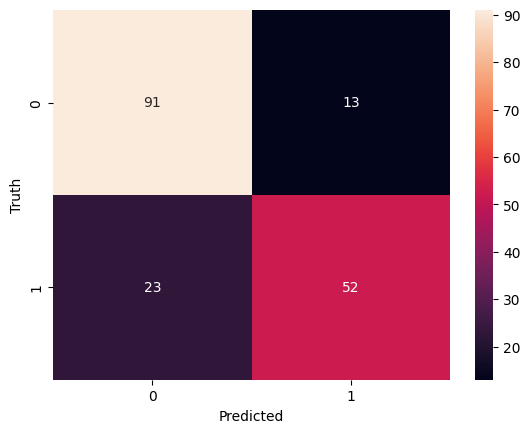

In [43]:
cm = confusion_matrix(y_test, y_predict_lg)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
accuracy_lg = accuracy_score(y_test, y_predict_lg)
accuracy_lg

0.7988826815642458

Training and Testing with SVM

In [32]:
svm = SVC()
svm.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
y_predict_svm = svm.predict(x_test)

Text(50.722222222222214, 0.5, 'Truth')

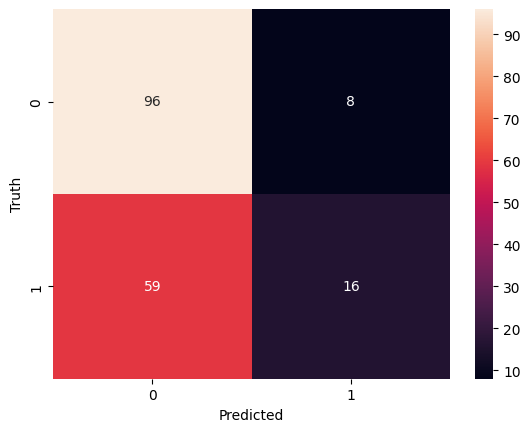

In [42]:
cm = confusion_matrix(y_test, y_predict_svm)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
accuracy_svm = accuracy_score(y_test, y_predict_svm)
accuracy_svm

0.6256983240223464

Training and Testing with Naive Bayes 

In [45]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [47]:
y_predict_nb = naive_bayes.predict(x_test)

Text(50.722222222222214, 0.5, 'Truth')

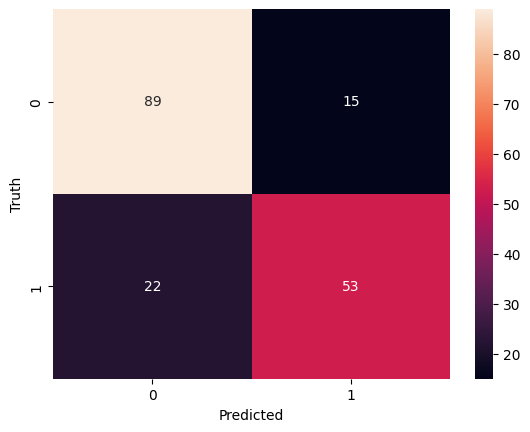

In [51]:
cm = confusion_matrix(y_test, y_predict_nb)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [53]:
accuracy_nb = accuracy_score(y_test, y_predict_nb)
accuracy_nb

0.7932960893854749

Training and Testing with Random Forest

In [55]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_predict_rf = random_forest.predict(x_test)

<Axes: >

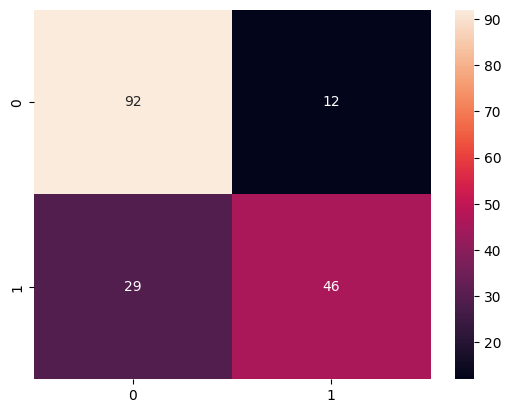

In [61]:
cm = confusion_matrix(y_test, y_predict_rf)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)

In [62]:
accuracy_rf = accuracy_score(y_test, y_predict_rf)
accuracy_rf

0.770949720670391

Comparing Models

<Axes: title={'center': 'Model Accuracy Comparison'}, xlabel='Models'>

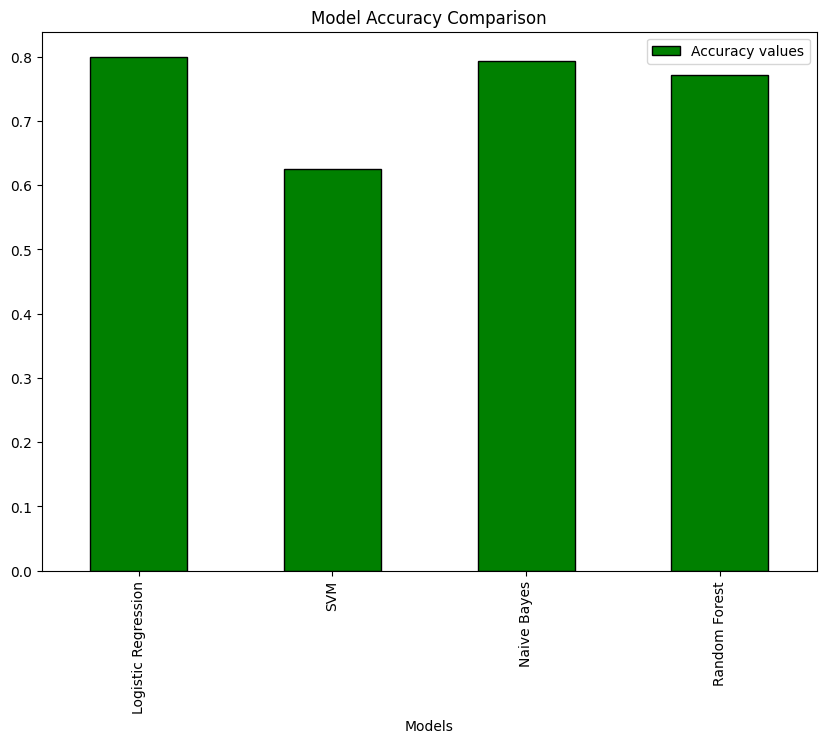

In [70]:
df_accuracy = pd.DataFrame({
        "Models": ["Logistic Regression", "SVM", "Naive Bayes", "Random Forest"],
        "Accuracy values": [accuracy_lg, accuracy_svm, accuracy_nb, accuracy_rf]
    }
)

df_accuracy.plot(kind="bar", x="Models", color="green", edgecolor="black", title="Model Accuracy Comparison", figsize=(10, 7))
